# Supervised Learning: Classification Models
## Lecture Notebook Part 3 of 6

---

## Learning Objectives

By the end of this notebook, you will be able to:
1. Understand what classification is and when to use it
2. Implement and evaluate logistic regression for classification
3. Understand decision trees and random forests
4. Comprehend support vector machines (SVM)
5. Apply k-nearest neighbors (k-NN) algorithm
6. Evaluate classification models using appropriate metrics

---

## 3.1 Introduction to Classification

### What is Classification?

**Classification** is a supervised learning technique used to predict discrete categorical labels or classes. Unlike regression, which predicts continuous numerical values, classification assigns data points to predefined categories. The output of a classification model is a class label (e.g., "spam" or "not spam", "disease" or "no disease"), not a numerical value.

Classification models learn to distinguish between different classes by identifying patterns in the training data that are associated with each class. The model builds a decision boundary (or multiple boundaries for multi-class problems) that separates different classes in the feature space. Once trained, the model can classify new, unseen data points by determining which side of the decision boundary they fall on.

Classification is one of the most common machine learning tasks, with applications spanning virtually every domain. The ability to automatically categorize data enables automation, decision support systems, and intelligent filtering across industries.

### Key Components of Classification

**Features (X)**: Input variables used for prediction. These can be numerical (e.g., age, height, test scores) or categorical (e.g., color, location, product type). Features are the attributes that help distinguish between different classes.

**Classes/Labels (y)**: Discrete categories to predict. In binary classification, there are two classes (e.g., positive/negative, yes/no, spam/not spam). In multi-class classification, there are three or more classes (e.g., animal species, product categories, sentiment levels).

**Decision Boundary**: The surface that separates different classes in the feature space. For linear classifiers, this is a hyperplane; for non-linear classifiers, it can be a complex curved surface. The decision boundary is learned during training and determines how new data points are classified.

**Class Probabilities**: Some classification models output probabilities for each class rather than just a class label. These probabilities indicate the model's confidence in its predictions and can be useful for decision-making when different misclassification costs exist.

### The Classification Process

The classification learning process follows these steps:

1. **Model learns patterns from labeled training data**: The algorithm receives training examples with both features and their corresponding class labels.

2. **Algorithm identifies decision boundaries**: The learning algorithm determines boundaries that best separate different classes based on the training examples. The complexity of these boundaries depends on the algorithm used.

3. **For new data, model assigns class label**: When presented with new, unlabeled data, the model determines which side of the decision boundary the data point falls on and assigns the corresponding class label.

4. **Some models provide probability estimates**: Many classification algorithms can also output the probability that a data point belongs to each class, which provides additional information beyond just the predicted class.

### Common Types of Classification

**Binary Classification**: The simplest form, involving exactly two classes. Examples include:
- Email spam detection (spam vs. not spam)
- Medical diagnosis (disease vs. no disease)
- Credit approval (approve vs. deny)
- Fraud detection (fraudulent vs. legitimate)

**Multi-class Classification**: Involves three or more classes. Examples include:
- Image recognition (identifying different objects)
- Handwritten digit recognition (0-9)
- Sentiment analysis (positive, negative, neutral)
- Animal species classification

**Multi-label Classification**: An advanced scenario where each instance can belong to multiple classes simultaneously (e.g., a news article can be tagged with multiple topics). This is beyond the scope of this introductory course but important to mention.

### Uses and Applications

Classification models are applied extensively across domains:

- **Email Filtering**: Automatically identifying spam emails to protect users from unwanted messages and phishing attempts.

- **Medical Diagnosis**: Assisting doctors in diagnosing diseases based on symptoms, test results, and patient history. For example, identifying cancerous cells in medical images or predicting disease risk.

- **Image Recognition**: Classifying objects, people, or scenes in photographs. Used in security systems, autonomous vehicles, and social media applications.

- **Sentiment Analysis**: Determining whether text expresses positive, negative, or neutral sentiment. Used in social media monitoring, product reviews, and customer feedback analysis.

- **Credit Risk Assessment**: Banks and financial institutions use classification to determine whether to approve loan applications based on applicant characteristics and credit history.

- **Customer Churn Prediction**: Identifying customers likely to cancel subscriptions or stop using services, enabling proactive retention efforts.

- **Quality Control**: Manufacturing companies use classification to identify defective products automatically.

The versatility and practical importance of classification make it a fundamental skill for data scientists.

---

## 3.2 Logistic Regression

### What is Logistic Regression?

**Logistic Regression** is a classification algorithm (despite its name containing "regression") that models the probability of a binary outcome using the logistic (sigmoid) function. While linear regression predicts continuous values, logistic regression predicts probabilities that are then converted to class labels.

The key insight of logistic regression is that it uses the logistic function to map any real-valued number to a value between 0 and 1, which can be interpreted as a probability. This makes it ideal for binary classification problems where we want to know not just the class, but also the confidence (probability) of that prediction.

Logistic regression is one of the most widely-used classification algorithms because it's simple, interpretable, fast to train, and provides probability estimates. It serves as an excellent baseline for classification problems and is often the first algorithm tried in practice.

### The Logistic Function

The core of logistic regression is the **sigmoid function** (also called the logistic function):

**P(y=1) = 1 / (1 + e^(-z))**

Where z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

The sigmoid function has an S-shaped curve that:
- Maps any real number to a value between 0 and 1
- Is symmetric around 0.5
- Has steep slopes near z=0 and flatter slopes at the extremes
- Ensures probabilities are always valid (between 0 and 1)

When z is very negative, P(y=1) approaches 0. When z is very positive, P(y=1) approaches 1. When z=0, P(y=1) = 0.5, which is the decision threshold.

### Key Components

**Log-odds (logit)**: The natural logarithm of the odds ratio. The logit function is the inverse of the sigmoid:

**logit(p) = ln(p / (1-p)) = β₀ + β₁x₁ + ... + βₙxₙ**

This shows that logistic regression is linear in the log-odds space, which is why it's called "linear" classification.

**Sigmoid Curve**: The S-shaped probability curve that ensures all predictions are valid probabilities. The steepness of the curve is controlled by the coefficients - larger coefficients create steeper transitions.

**Decision Threshold**: Typically set at 0.5, meaning if P(y=1) ≥ 0.5, predict class 1; otherwise predict class 0. However, this threshold can be adjusted based on the problem requirements. For example, in medical diagnosis where false negatives are critical, you might use a lower threshold (e.g., 0.3) to catch more positive cases.

### How Logistic Regression Works

The training process involves:

1. **Maximum Likelihood Estimation (MLE)**: Unlike linear regression which uses least squares, logistic regression uses MLE to find optimal coefficients. MLE finds the coefficient values that maximize the probability of observing the training data.

2. **Coefficient Interpretation**: Each coefficient βᵢ represents the change in log-odds for a one-unit increase in feature xᵢ, holding other features constant. The exponential of βᵢ (e^βᵢ) represents the odds ratio, showing how the odds of the positive class change.

3. **Decision Boundary Formation**: The decision boundary occurs where P(y=1) = 0.5, which corresponds to z = 0, or β₀ + β₁x₁ + ... + βₙxₙ = 0. This creates a linear decision boundary in the feature space.

4. **Multi-class Extension**: For multi-class problems, logistic regression can be extended using:
   - **One-vs-Rest (OvR)**: Train one binary classifier per class
   - **Multinomial Logistic Regression**: Directly model multi-class probabilities using softmax function

### Advantages and Limitations

**Advantages**:
- **Interpretable**: Coefficients have clear meaning (log-odds, odds ratios)
- **Fast Training**: Efficient optimization algorithms available
- **No Assumptions about Feature Distributions**: Works with various feature types
- **Provides Probabilities**: Useful for decision-making under uncertainty
- **Regularization Available**: Can use L1 or L2 regularization to prevent overfitting
- **Works Well as Baseline**: Often provides competitive performance

**Limitations**:
- **Assumes Linear Decision Boundary**: Cannot capture complex non-linear relationships without feature engineering
- **Sensitive to Outliers**: Extreme feature values can disproportionately influence the model
- **Requires Feature Scaling**: For regularization to work properly, features should be scaled
- **May Underperform on Complex Problems**: Non-linear algorithms often perform better on complex datasets

### Evaluation Metrics for Classification

**Accuracy**: The proportion of correct predictions. Simple and intuitive, but can be misleading with imbalanced datasets.

**Precision**: Of all instances predicted as positive, how many are actually positive. Important when false positives are costly.

**Recall (Sensitivity)**: Of all actual positive instances, how many were correctly identified. Important when false negatives are costly.

**F1-Score**: Harmonic mean of precision and recall. Provides a balanced measure when you need to consider both precision and recall.

**ROC Curve and AUC**: Receiver Operating Characteristic curve plots true positive rate vs. false positive rate at different thresholds. AUC (Area Under Curve) provides a single metric summarizing performance across all thresholds.

**Confusion Matrix**: A table showing true positives, false positives, true negatives, and false negatives. Provides detailed insight into model performance.

---

## 3.3 Decision Trees

### What is a Decision Tree?

**Decision Trees** are tree-like models that make decisions by asking a series of questions about features, leading to leaf nodes that represent class predictions. The tree structure mimics human decision-making processes, making them highly interpretable.

A decision tree consists of nodes and branches:
- **Root Node**: The topmost node containing all training data
- **Internal Nodes**: Decision points that test feature values (e.g., "Is age > 30?")
- **Branches**: Outcomes of decisions (e.g., "yes" or "no")
- **Leaf Nodes**: Terminal nodes that contain final predictions (class labels)

Decision trees are non-parametric models, meaning they don't assume any specific form for the underlying relationship between features and target. This flexibility allows them to capture complex, non-linear relationships and interactions between features.

### How Decision Trees Work

The tree-building process follows these steps:

1. **Start with root node**: Begin with all training data at the root.

2. **Find best feature and threshold**: For each feature, find the threshold value that best splits the data. "Best" is measured using a splitting criterion (Gini impurity, entropy, etc.).

3. **Create child nodes**: Split the data based on the chosen feature and threshold, creating child nodes for each outcome.

4. **Recursively repeat**: Apply the same process to each child node until a stopping criterion is met (maximum depth reached, minimum samples per node, etc.).

5. **Assign class labels**: Leaf nodes are assigned the majority class of training instances that reach that leaf.

The key challenge is determining the "best" split at each node, which is done by maximizing information gain or minimizing impurity.

### Splitting Criteria

**Gini Impurity**: Measures the probability of misclassifying a randomly chosen element if it were labeled according to the class distribution in the node. Ranges from 0 (pure node, all same class) to 0.5 (maximum impurity, equal class distribution).

**Gini = 1 - Σ(pᵢ)²** where pᵢ is the proportion of class i in the node.

**Entropy/Information Gain**: Entropy measures the uncertainty or randomness in the node. Information gain is the reduction in entropy achieved by splitting.

**Entropy = -Σ(pᵢ × log₂(pᵢ))**

Higher information gain means the split better separates classes. The algorithm chooses splits that maximize information gain.

**Chi-square**: A statistical test for independence. Used in some tree algorithms to test whether a split significantly improves class separation.

### Advantages and Limitations

**Advantages**:
- **Highly Interpretable**: Easy to visualize and understand the decision process
- **Handles Non-linear Relationships**: Can capture complex patterns without feature transformation
- **Works with Mixed Data Types**: Handles both numerical and categorical features naturally
- **No Feature Scaling Needed**: Tree-based algorithms are scale-invariant
- **Feature Importance Available**: Can identify which features are most important
- **Handles Missing Values**: Some implementations can handle missing data gracefully

**Limitations**:
- **Prone to Overfitting**: Trees can grow very deep and memorize training data
- **Sensitive to Small Data Changes**: Small changes in data can result in very different trees
- **Can Create Biased Trees**: With imbalanced classes, trees may favor majority class
- **Greedy Algorithm**: May miss optimal splits by choosing locally optimal splits
- **Not Suitable for Extrapolation**: Poor performance outside training data range

### Preventing Overfitting

Several techniques help prevent overfitting in decision trees:

**Maximum Depth**: Limit how deep the tree can grow. Shallow trees are simpler and less prone to overfitting.

**Minimum Samples per Split**: Require a minimum number of samples before allowing a split. Prevents splits on very small subsets.

**Minimum Samples per Leaf**: Require a minimum number of samples in leaf nodes. Ensures predictions are based on sufficient data.

**Pruning**: Remove branches that don't significantly improve performance:
- **Pre-pruning**: Stop tree growth early based on criteria
- **Post-pruning**: Grow full tree, then remove branches that don't improve validation performance

**Cost Complexity Pruning**: Balance tree complexity against performance using a complexity parameter.

---

## 3.4 Random Forest

### What is Random Forest?

**Random Forest** is an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. The "random" aspect comes from two sources of randomness: bootstrap sampling of data and random feature selection at each split.

Random Forest addresses the main weaknesses of individual decision trees:
- Reduces overfitting by averaging predictions from multiple trees
- Improves generalization by combining diverse trees
- Provides more stable predictions than single trees
- Maintains interpretability through feature importance

The idea behind Random Forest is that while individual trees may overfit, averaging predictions from many diverse trees reduces variance and improves generalization. This is an example of the "wisdom of crowds" principle in machine learning.

### Key Concepts

**Ensemble Learning**: Combining multiple models to achieve better performance than any single model. Random Forest is a type of ensemble called "bagging" (bootstrap aggregating).

**Bootstrap Aggregating (Bagging)**: Each tree is trained on a random sample (with replacement) of the training data. This creates diversity among trees and reduces overfitting.

**Feature Randomness**: At each split, each tree considers only a random subset of features. This further increases diversity and prevents trees from always using the same strong features.

**Voting**: For classification, the final prediction is the majority vote of all trees. For regression, it's the average prediction. This aggregation reduces variance and improves robustness.

### How Random Forest Works

The Random Forest algorithm follows these steps:

1. **Create Bootstrap Samples**: Randomly sample the training data with replacement to create multiple datasets. Each dataset has the same size as the original but may contain duplicate samples.

2. **Train Decision Trees**: For each bootstrap sample, train a decision tree. At each split in each tree, randomly select a subset of features to consider (typically √n features for classification, where n is total features).

3. **Grow Trees Fully**: Unlike single decision trees which may be pruned, Random Forest trees are typically grown to maximum depth or until all leaves are pure.

4. **Aggregate Predictions**: For new data, get predictions from all trees and combine them:
   - **Classification**: Majority vote (most common class)
   - **Regression**: Average of all predictions

5. **Calculate Feature Importance**: Average the importance scores from all trees to get overall feature importance.

### Advantages

**Reduces Overfitting**: By averaging multiple trees, Random Forest reduces the variance that causes overfitting in individual trees.

**Handles Missing Values**: Can handle missing data through surrogate splits or by using median/mode imputation.

**Provides Feature Importance**: Aggregates feature importance across all trees, giving reliable importance scores.

**Works Well with Default Parameters**: Often performs well without extensive hyperparameter tuning, making it easy to use.

**Less Sensitive to Outliers**: Averaging across trees reduces the impact of outliers.

**Handles Large Datasets**: Can be parallelized efficiently, making it suitable for large datasets.

**No Feature Scaling Required**: Like decision trees, Random Forest doesn't require feature scaling.

### Hyperparameters

Key hyperparameters to tune:

**n_estimators**: Number of trees in the forest. More trees generally improve performance but increase computation time. Typically 100-500 trees.

**max_depth**: Maximum depth of trees. Deeper trees can capture more complex patterns but may overfit. None allows full growth.

**min_samples_split**: Minimum samples required to split a node. Higher values create simpler trees.

**min_samples_leaf**: Minimum samples required in a leaf node. Higher values create more conservative trees.

**max_features**: Number of features to consider at each split. Common choices: 'sqrt' (√n), 'log2' (log₂n), or a specific number.

**bootstrap**: Whether to use bootstrap sampling (default True). Can set to False to use all data for each tree.

---

## 3.5 Support Vector Machines (SVM)

### What is SVM?

**Support Vector Machines (SVM)** is a powerful classification algorithm that finds the optimal hyperplane (decision boundary) that maximizes the margin between classes. The "support vectors" are the data points closest to the decision boundary, and these points alone determine the boundary.

SVM is based on the idea that the best decision boundary is the one that maximizes the separation (margin) between classes. This makes SVM particularly robust and less prone to overfitting, as it focuses on the most difficult-to-classify points (support vectors) rather than trying to fit all training points perfectly.

SVM can handle both linear and non-linear classification problems through the use of kernel functions, making it versatile for various types of data.

### Key Concepts

**Support Vectors**: The data points closest to the decision boundary. These are the "critical" points that define the boundary. Only support vectors affect the model - other points can be removed without changing the decision boundary.

**Margin**: The distance between the decision boundary and the nearest data points of each class. SVM aims to maximize this margin, creating the widest possible "street" between classes.

**Hyperplane**: In n-dimensional space, a hyperplane is an (n-1)-dimensional flat surface that separates the space. For 2D data, it's a line; for 3D data, it's a plane.

**Kernel Trick**: A method to handle non-linear relationships by mapping data to a higher-dimensional space where it becomes linearly separable, without explicitly computing the transformation.

### How SVM Works

The SVM algorithm works as follows:

1. **Find Optimal Hyperplane**: SVM finds the hyperplane that maximizes the margin between classes. This is formulated as a constrained optimization problem.

2. **Support Vectors Determine Boundary**: Only the support vectors (points on the margin boundaries) influence the decision boundary. This makes SVM memory-efficient.

3. **Handle Non-linear Problems**: For non-linear problems, SVM uses kernel functions to map data to higher dimensions where it becomes linearly separable:
   - **Linear Kernel**: For linearly separable data
   - **Polynomial Kernel**: Captures polynomial relationships
   - **RBF (Radial Basis Function) Kernel**: Most common, handles complex non-linear boundaries
   - **Sigmoid Kernel**: Similar to neural network activation

4. **Soft Margin**: Real data is rarely perfectly separable. Soft margin SVM allows some misclassification using slack variables, controlled by the C parameter.

### Types of SVM

**Hard Margin SVM**: Assumes data is perfectly linearly separable. Rarely used in practice because real data almost always has some overlap or noise.

**Soft Margin SVM**: Allows some misclassification to handle noisy or overlapping data. The C parameter controls the trade-off between maximizing margin and minimizing misclassification. Higher C means less tolerance for misclassification.

**Kernel SVM**: Uses kernel functions to handle non-linear relationships. The RBF kernel is most popular and works well for a wide variety of problems.

### Advantages and Limitations

**Advantages**:
- **Effective in High Dimensions**: Works well even when number of features exceeds number of samples
- **Memory Efficient**: Uses only support vectors, not all training data
- **Versatile**: Different kernels handle various problem types
- **Works Well with Clear Margin**: Excellent when classes are well-separated
- **Regularization Built-in**: The margin maximization provides natural regularization

**Limitations**:
- **Poor Performance on Large Datasets**: Training time scales poorly with dataset size
- **Sensitive to Feature Scaling**: Requires features to be on similar scales
- **Doesn't Provide Probability Estimates Directly**: Requires additional calibration step
- **Less Interpretable**: Harder to understand than tree-based methods
- **Hyperparameter Sensitive**: Performance depends heavily on C and kernel parameters
- **Not Suitable for Noisy Data**: Can be sensitive to outliers

---

## 3.6 k-Nearest Neighbors (k-NN)

### What is k-NN?

**k-Nearest Neighbors (k-NN)** is a simple, instance-based learning algorithm that classifies data points based on the majority class of their k nearest neighbors. Unlike most algorithms that build explicit models during training, k-NN is a "lazy learner" that stores all training data and computes predictions on-demand.

The fundamental assumption of k-NN is that similar instances (close in feature space) belong to the same class. This is a reasonable assumption for many problems and makes k-NN intuitive and easy to understand.

k-NN is non-parametric, meaning it doesn't assume any specific form for the underlying data distribution. This makes it flexible and able to capture complex decision boundaries.

### Key Concepts

**Instance-Based Learning**: k-NN doesn't learn a model during training. Instead, it memorizes all training examples and uses them directly for prediction. This is why it's called "lazy learning" - the work is done at prediction time.

**Distance Metrics**: k-NN relies on distance calculations to find nearest neighbors:
- **Euclidean Distance**: Straight-line distance in feature space (most common)
- **Manhattan Distance**: Sum of absolute differences (useful for high-dimensional data)
- **Minkowski Distance**: Generalization of Euclidean and Manhattan
- **Hamming Distance**: For categorical data

**k Parameter**: The number of neighbors to consider. This is the main hyperparameter:
- Small k (e.g., k=1): More sensitive to noise, lower bias but higher variance
- Large k (e.g., k=20): Smoother decision boundaries, higher bias but lower variance
- Common practice: Use odd k for binary classification to avoid ties

**Lazy Learning**: The algorithm doesn't perform any computation during training - it simply stores the data. All computation happens during prediction, which can be slow for large datasets.

### How k-NN Works

The k-NN algorithm follows these steps:

1. **Store Training Data**: Simply memorize all training examples (no model building).

2. **For New Data Point**: Calculate distances to all training points using chosen distance metric.

3. **Identify k Nearest Neighbors**: Find the k training points closest to the new point.

4. **For Classification**: Majority vote of neighbors' classes. For example, if k=5 and 3 neighbors are class A and 2 are class B, predict class A.

5. **For Regression**: Average of neighbors' values (though k-NN is primarily used for classification).

The simplicity of this algorithm is both its strength and weakness - it's easy to understand and implement, but can be computationally expensive for large datasets.

### Choosing k

Selecting the right k is crucial:

**Small k (k=1 or k=3)**:
- More sensitive to local patterns and noise
- Lower bias (can capture complex boundaries)
- Higher variance (predictions vary more with small data changes)
- Risk of overfitting

**Large k (k=15 or k=20)**:
- Smoother decision boundaries
- Higher bias (may miss local patterns)
- Lower variance (more stable predictions)
- Risk of underfitting

**Best Practices**:
- Use odd k for binary classification to avoid ties
- Use cross-validation to select optimal k
- Consider dataset size: larger datasets can use larger k
- Start with k = √n (square root of number of samples) as a rule of thumb

### Advantages and Limitations

**Advantages**:
- **Simple to Understand**: Intuitive algorithm that's easy to explain
- **No Assumptions**: Doesn't assume any specific data distribution
- **Works Well for Non-linear Problems**: Can capture complex decision boundaries
- **Naturally Handles Multi-class**: No special modifications needed
- **No Training Time**: Instant "training" (just storing data)
- **Adapts to Local Patterns**: Can capture local structure in data

**Limitations**:
- **Computationally Expensive**: Must compute distances to all training points for each prediction
- **Sensitive to Irrelevant Features**: All features contribute equally to distance
- **Requires Feature Scaling**: Features on different scales will dominate distance calculations
- **Performance Depends on Distance Metric**: Choice of metric significantly affects results
- **Sensitive to Curse of Dimensionality**: Performance degrades in high-dimensional spaces
- **Memory Intensive**: Must store all training data
- **Slow Prediction**: Prediction time increases with dataset size

---

## Summary and Key Takeaways

1. **Classification** predicts discrete class labels by learning decision boundaries in feature space.

2. **Logistic Regression** provides interpretable, probabilistic predictions with linear decision boundaries.

3. **Decision Trees** offer high interpretability and can capture non-linear relationships but are prone to overfitting.

4. **Random Forest** combines multiple trees to reduce overfitting while maintaining interpretability through feature importance.

5. **SVM** maximizes margin between classes and can handle non-linear problems through kernels, but requires feature scaling.

6. **k-NN** is simple and intuitive but computationally expensive, requiring careful feature scaling and distance metric selection.

7. **Evaluation Metrics** (accuracy, precision, recall, F1, ROC-AUC) must be chosen based on problem requirements and class imbalance.

8. **Model Selection** depends on interpretability needs, dataset size, feature characteristics, and performance requirements.

---

## Further Reading

- James, G., et al. (2013). *An Introduction to Statistical Learning*. Springer.
- Scikit-learn Classification Documentation: https://scikit-learn.org/stable/supervised_learning.html#classification

---

## Practice Exercises

1. Explain the difference between precision and recall. When would you prioritize one over the other?

2. Why are decision trees prone to overfitting? What techniques can prevent this?

3. How does Random Forest address the limitations of individual decision trees?

4. What is the kernel trick in SVM? Why is it useful?

5. Why does k-NN require feature scaling? What happens if features aren't scaled?



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore classification models!")


Libraries imported successfully!
Ready to explore classification models!


### Example 1: Logistic Regression

Let's start with a logistic regression example for binary classification:


Logistic Regression Results:
Training Accuracy: 0.8538
Test Accuracy: 0.8450

Test Set Metrics:
  Precision: 0.8652
  Recall: 0.8021
  F1-Score: 0.8324

Confusion Matrix:
[[92 12]
 [19 77]]


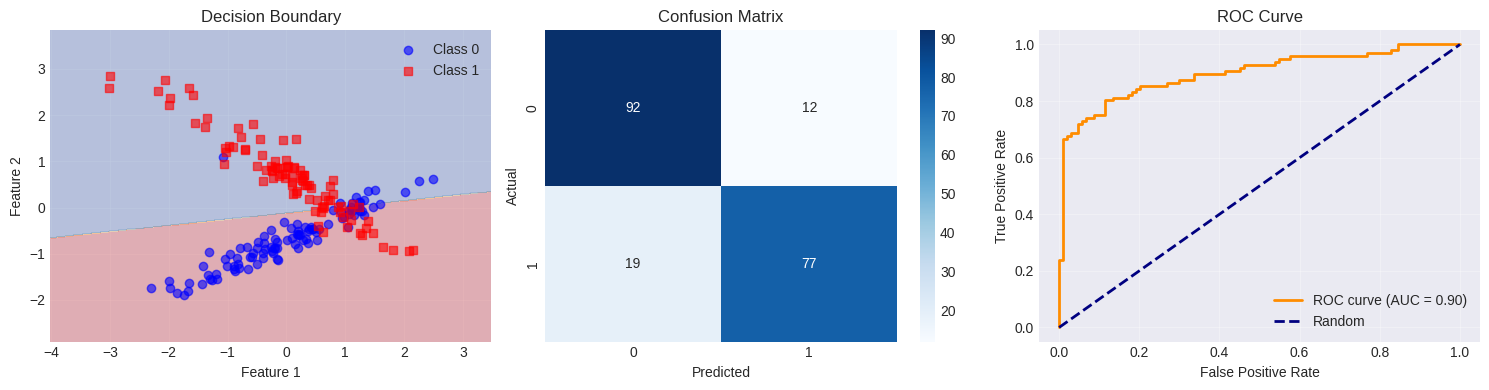


Coefficients: [-0.38982289  2.91361105]
Intercept: 0.34781067537244575


In [ ]:
# Generate sample data for binary classification
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           random_state=42, class_sep=0.8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for logistic regression with regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
y_test_proba = lr.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate metrics
print("Logistic Regression Results:")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"\nTest Set Metrics:")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print(f"\nConfusion Matrix:")
print(cm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Decision boundary
ax = axes[0]
h = 0.02
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
ax.scatter(X_test_scaled[y_test==0, 0], X_test_scaled[y_test==0, 1],
           c='blue', marker='o', label='Class 0', alpha=0.6)
ax.scatter(X_test_scaled[y_test==1, 0], X_test_scaled[y_test==1, 1],
           c='red', marker='s', label='Class 1', alpha=0.6)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Decision Boundary')
ax.legend()
ax.grid(True, alpha=0.3)

# Confusion Matrix Heatmap
ax = axes[1]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# ROC Curve
ax = axes[2]
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCoefficients: {lr.coef_[0]}")
print(f"Intercept: {lr.intercept_[0]}")


### Example 2: Decision Trees

Demonstrating decision trees with visualization:


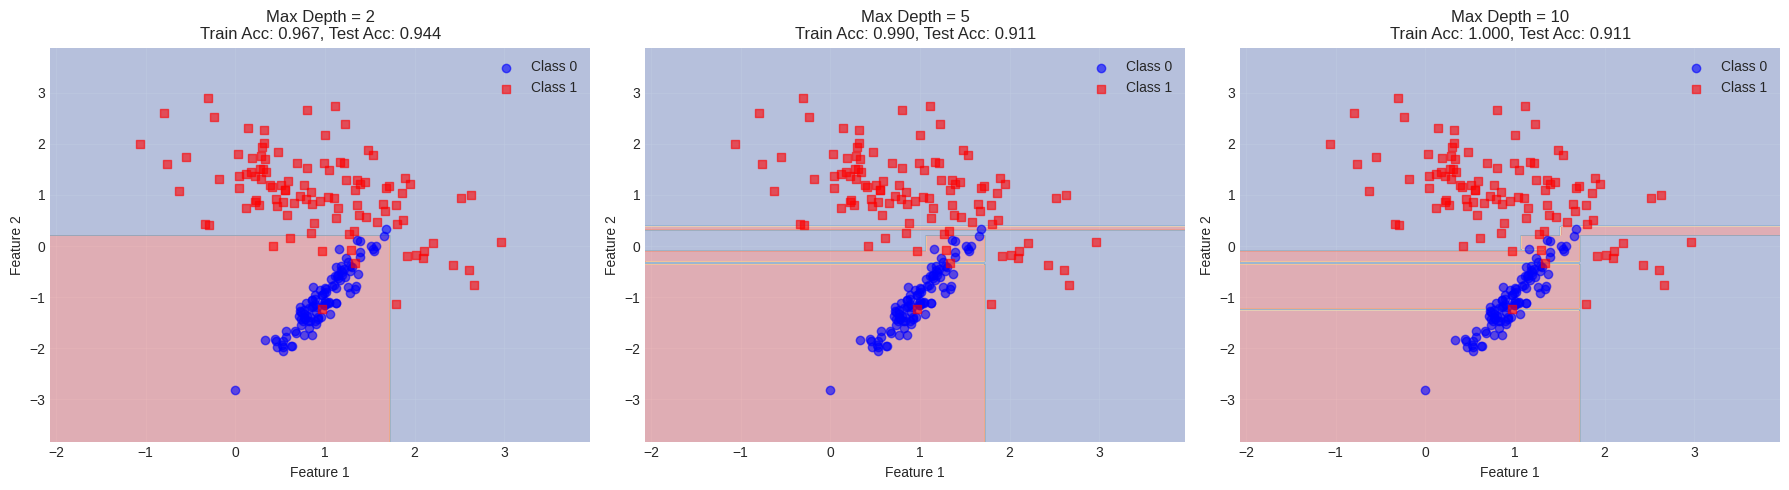

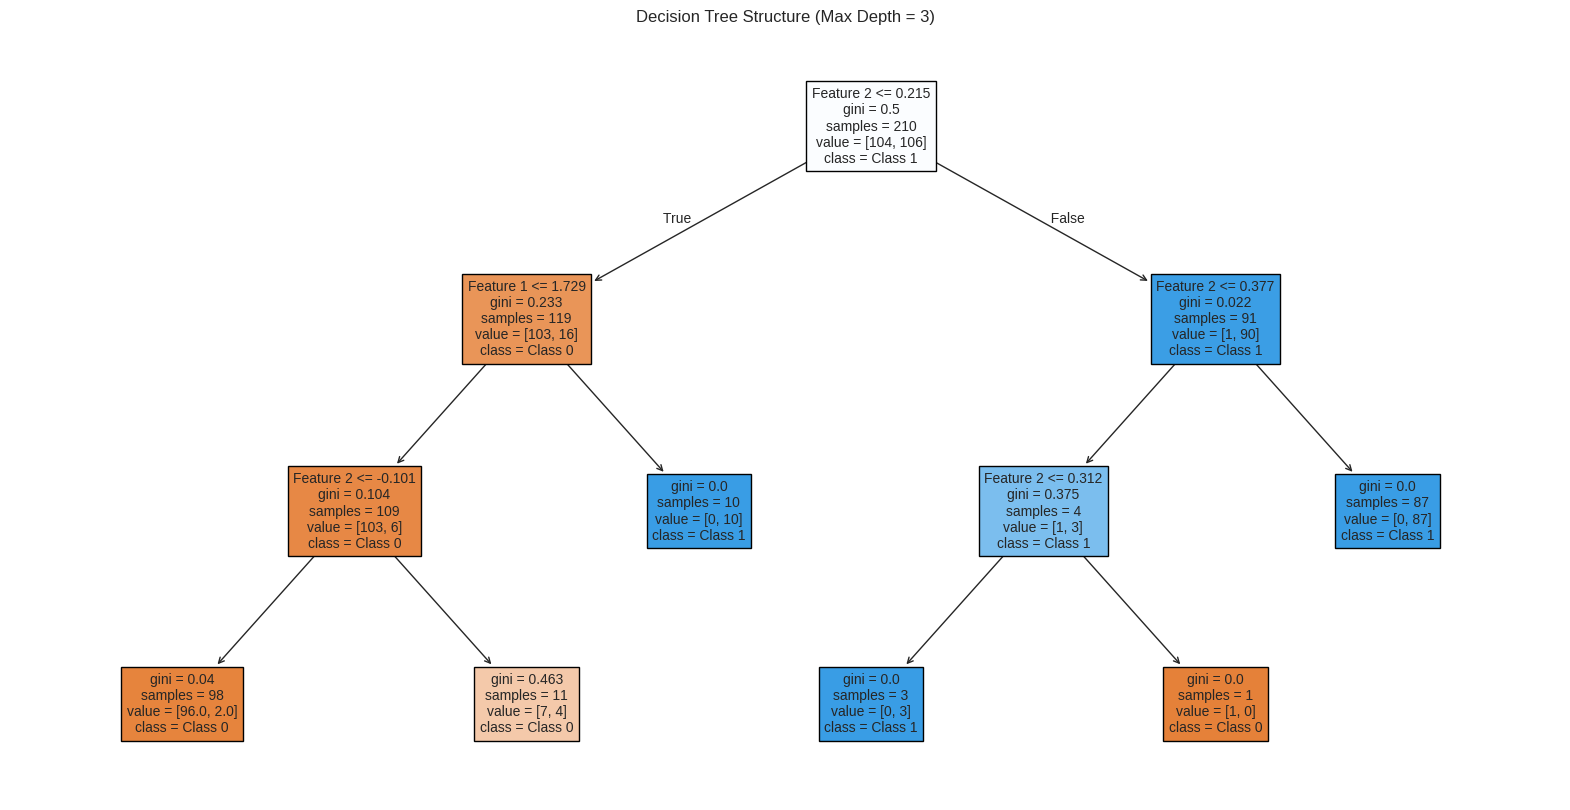


Feature Importances:
Feature 1: 0.1704
Feature 2: 0.8296


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create dataset
X_tree, y_tree = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                     n_informative=2, n_clusters_per_class=1,
                                     random_state=42)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_tree, y_tree, test_size=0.3, random_state=42
)

# Train decision trees with different depths
depths = [2, 5, 10]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, depth in enumerate(depths):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_t, y_train_t)

    train_acc = accuracy_score(y_train_t, dt.predict(X_train_t))
    test_acc = accuracy_score(y_test_t, dt.predict(X_test_t))

    # Plot decision boundary
    h = 0.02
    x_min, x_max = X_tree[:, 0].min() - 1, X_tree[:, 0].max() + 1
    y_min, y_max = X_tree[:, 1].min() - 1, X_tree[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    axes[idx].scatter(X_train_t[y_train_t==0, 0], X_train_t[y_train_t==0, 1],
                     c='blue', marker='o', label='Class 0', alpha=0.6)
    axes[idx].scatter(X_train_t[y_train_t==1, 0], X_train_t[y_train_t==1, 1],
                     c='red', marker='s', label='Class 1', alpha=0.6)
    axes[idx].set_title(f'Max Depth = {depth}\nTrain Acc: {train_acc:.3f}, Test Acc: {test_acc:.3f}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize tree structure
dt_vis = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_vis.fit(X_train_t, y_train_t)

plt.figure(figsize=(20, 10))
plot_tree(dt_vis, filled=True, feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1'], fontsize=10)
plt.title('Decision Tree Structure (Max Depth = 3)')
plt.show()

print("\nFeature Importances:")
print(f"Feature 1: {dt_vis.feature_importances_[0]:.4f}")
print(f"Feature 2: {dt_vis.feature_importances_[1]:.4f}")


### Example 3: Random Forest

Comparing Random Forest with a single decision tree:


Model Comparison:

Single Decision Tree:
  Training Accuracy: 1.0000
  Test Accuracy: 0.9600
  Test F1-Score: 0.9592

Random Forest (100 trees):
  Training Accuracy: 1.0000
  Test Accuracy: 0.9667
  Test F1-Score: 0.9662


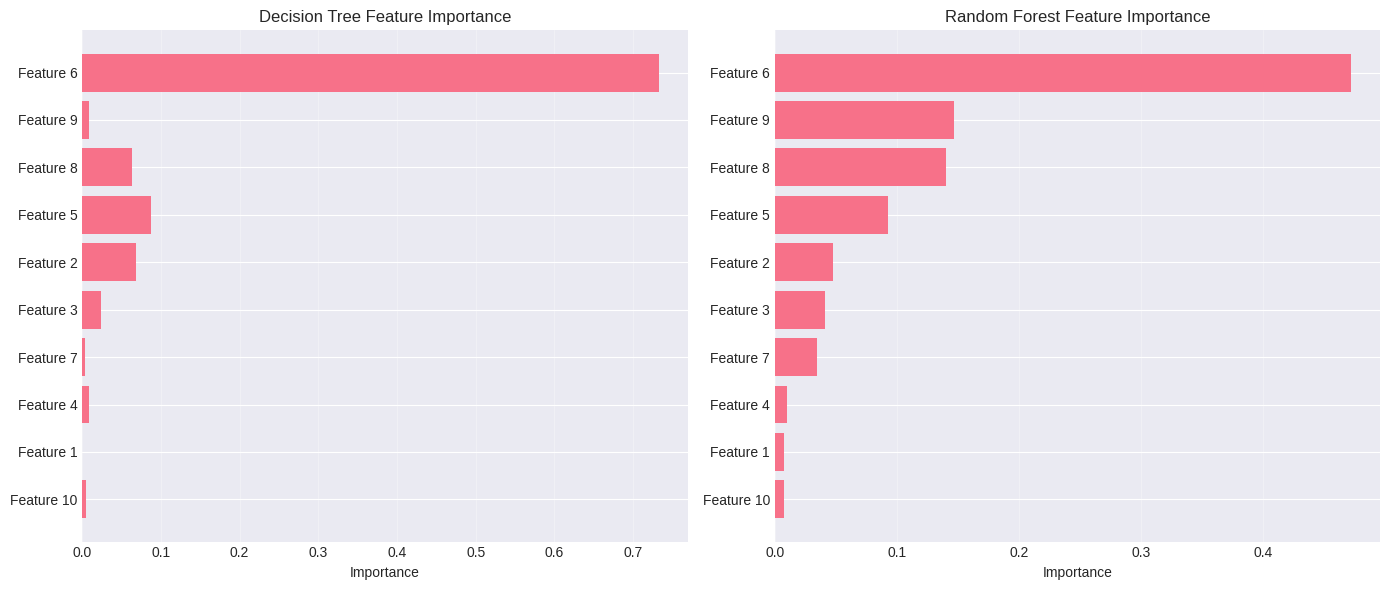


Observations:
- Random Forest typically has better generalization (lower overfitting)
- Feature importances are more stable in Random Forest
- Random Forest uses averaging to reduce variance


In [ ]:
# Create more complex dataset
X_rf, y_rf = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                 n_redundant=2, n_clusters_per_class=1,
                                 random_state=42)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf, test_size=0.3, random_state=42
)

# Train single decision tree
dt_single = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_single.fit(X_train_rf, y_train_rf)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_rf, y_train_rf)

# Predictions
dt_train_pred = dt_single.predict(X_train_rf)
dt_test_pred = dt_single.predict(X_test_rf)
rf_train_pred = rf.predict(X_train_rf)
rf_test_pred = rf.predict(X_test_rf)

# Compare performance
print("Model Comparison:")
print(f"\nSingle Decision Tree:")
print(f"  Training Accuracy: {accuracy_score(y_train_rf, dt_train_pred):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test_rf, dt_test_pred):.4f}")
print(f"  Test F1-Score: {f1_score(y_test_rf, dt_test_pred):.4f}")

print(f"\nRandom Forest (100 trees):")
print(f"  Training Accuracy: {accuracy_score(y_train_rf, rf_train_pred):.4f}")
print(f"  Test Accuracy: {accuracy_score(y_test_rf, rf_test_pred):.4f}")
print(f"  Test F1-Score: {f1_score(y_test_rf, rf_test_pred):.4f}")

# Feature importance comparison
feature_names = [f'Feature {i+1}' for i in range(10)]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': dt_single.feature_importances_,
    'Random Forest': rf.feature_importances_
})

# Visualize feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

importance_df_sorted = importance_df.sort_values('Random Forest', ascending=True)
axes[0].barh(importance_df_sorted['Feature'], importance_df_sorted['Decision Tree'])
axes[0].set_xlabel('Importance')
axes[0].set_title('Decision Tree Feature Importance')
axes[0].grid(True, alpha=0.3, axis='x')

axes[1].barh(importance_df_sorted['Feature'], importance_df_sorted['Random Forest'])
axes[1].set_xlabel('Importance')
axes[1].set_title('Random Forest Feature Importance')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Random Forest typically has better generalization (lower overfitting)")
print("- Feature importances are more stable in Random Forest")
print("- Random Forest uses averaging to reduce variance")


### Example 4: Support Vector Machine (SVM)

Demonstrating SVM with different kernels:


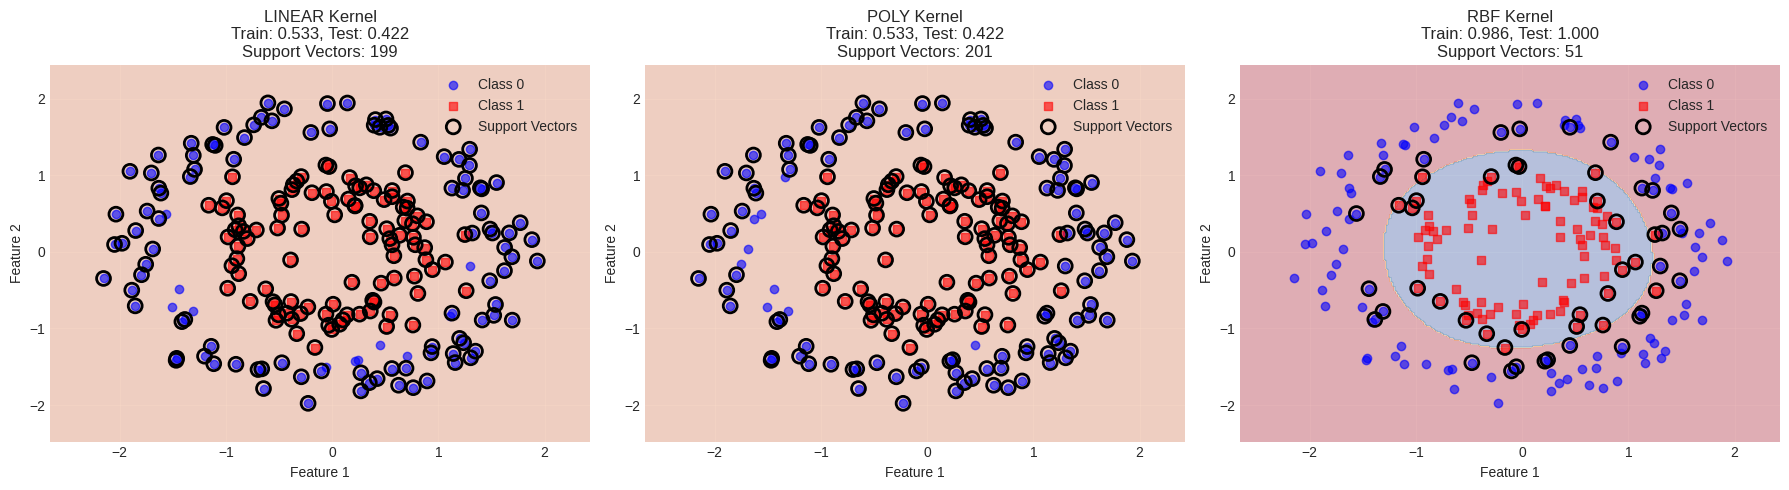


Observations:
- Linear kernel: Simple linear boundary, may not work for non-linear data
- Polynomial kernel: Can capture non-linear relationships
- RBF kernel: Most flexible, can handle complex boundaries
- Support vectors are the critical points that define the decision boundary


In [ ]:
# Create non-linearly separable data
from sklearn.datasets import make_circles

X_svm, y_svm = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm, test_size=0.3, random_state=42
)

# Scale features (important for SVM)
scaler_svm = StandardScaler()
X_train_svm_scaled = scaler_svm.fit_transform(X_train_svm)
X_test_svm_scaled = scaler_svm.transform(X_test_svm)

# Train SVMs with different kernels
kernels = ['linear', 'poly', 'rbf']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, kernel in enumerate(kernels):
    svm = SVC(kernel=kernel, random_state=42, probability=True)
    svm.fit(X_train_svm_scaled, y_train_svm)

    train_acc = accuracy_score(y_train_svm, svm.predict(X_train_svm_scaled))
    test_acc = accuracy_score(y_test_svm, svm.predict(X_test_svm_scaled))

    # Plot decision boundary
    h = 0.02
    x_min, x_max = X_train_svm_scaled[:, 0].min() - 0.5, X_train_svm_scaled[:, 0].max() + 0.5
    y_min, y_max = X_train_svm_scaled[:, 1].min() - 0.5, X_train_svm_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    axes[idx].scatter(X_train_svm_scaled[y_train_svm==0, 0], X_train_svm_scaled[y_train_svm==0, 1],
                     c='blue', marker='o', label='Class 0', alpha=0.6)
    axes[idx].scatter(X_train_svm_scaled[y_train_svm==1, 0], X_train_svm_scaled[y_train_svm==1, 1],
                     c='red', marker='s', label='Class 1', alpha=0.6)

    # Highlight support vectors
    axes[idx].scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                     s=100, facecolors='none', edgecolors='black', linewidths=2,
                     label='Support Vectors')

    axes[idx].set_title(f'{kernel.upper()} Kernel\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}\nSupport Vectors: {len(svm.support_vectors_)}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- Linear kernel: Simple linear boundary, may not work for non-linear data")
print("- Polynomial kernel: Can capture non-linear relationships")
print("- RBF kernel: Most flexible, can handle complex boundaries")
print("- Support vectors are the critical points that define the decision boundary")


### Example 5: k-Nearest Neighbors (k-NN)

Demonstrating k-NN with different k values:


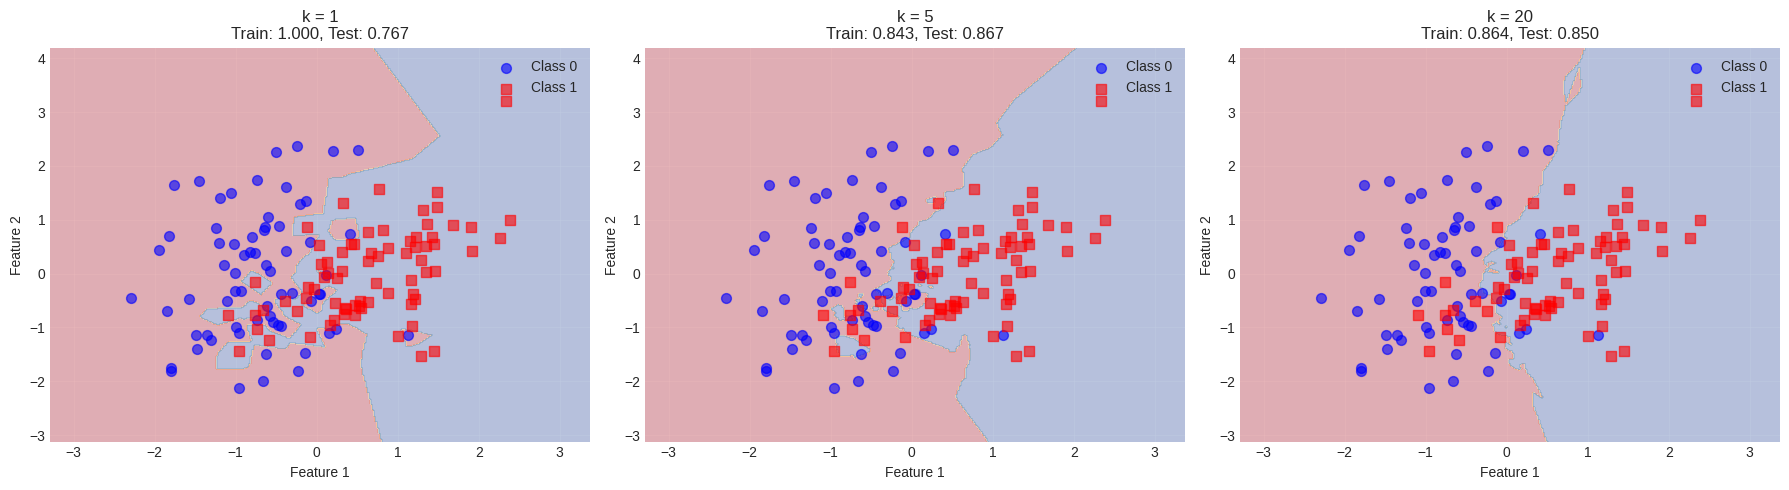

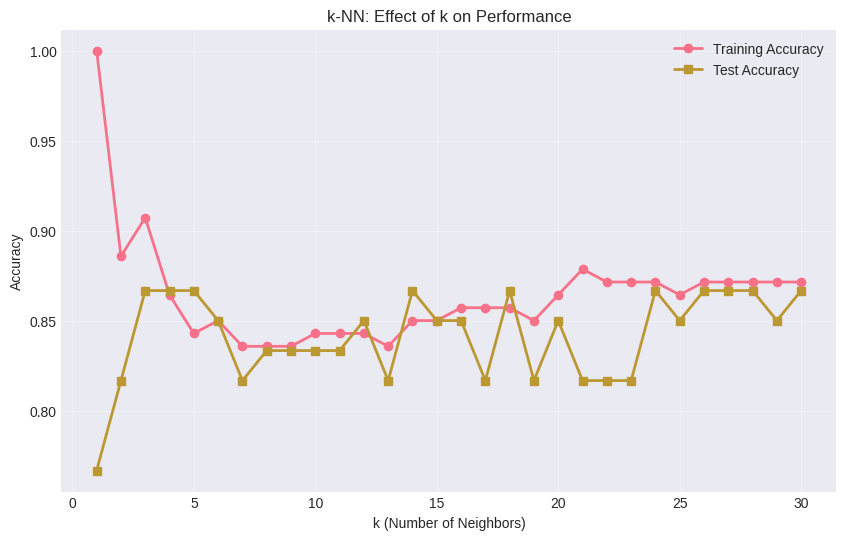


Observations:
- Small k (k=1): More complex boundary, may overfit
- Large k (k=20): Smoother boundary, may underfit
- Optimal k balances bias and variance
- Feature scaling is critical for k-NN (distance-based algorithm)


In [ ]:
# Create dataset
X_knn, y_knn = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                  n_informative=2, n_clusters_per_class=1,
                                  random_state=42)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.3, random_state=42
)

# Scale features (critical for k-NN)
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_knn)
X_test_knn_scaled = scaler_knn.transform(X_test_knn)

# Test different k values
k_values = [1, 5, 20]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn_scaled, y_train_knn)

    train_acc = accuracy_score(y_train_knn, knn.predict(X_train_knn_scaled))
    test_acc = accuracy_score(y_test_knn, knn.predict(X_test_knn_scaled))

    # Plot decision boundary
    h = 0.02
    x_min, x_max = X_train_knn_scaled[:, 0].min() - 1, X_train_knn_scaled[:, 0].max() + 1
    y_min, y_max = X_train_knn_scaled[:, 1].min() - 1, X_train_knn_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    axes[idx].scatter(X_train_knn_scaled[y_train_knn==0, 0], X_train_knn_scaled[y_train_knn==0, 1],
                     c='blue', marker='o', label='Class 0', alpha=0.6, s=50)
    axes[idx].scatter(X_train_knn_scaled[y_train_knn==1, 0], X_train_knn_scaled[y_train_knn==1, 1],
                     c='red', marker='s', label='Class 1', alpha=0.6, s=50)
    axes[idx].set_title(f'k = {k}\nTrain: {train_acc:.3f}, Test: {test_acc:.3f}')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare k values
k_range = range(1, 31)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn_scaled, y_train_knn)
    train_scores.append(accuracy_score(y_train_knn, knn.predict(X_train_knn_scaled)))
    test_scores.append(accuracy_score(y_test_knn, knn.predict(X_test_knn_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(k_range, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('k-NN: Effect of k on Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nObservations:")
print("- Small k (k=1): More complex boundary, may overfit")
print("- Large k (k=20): Smoother boundary, may underfit")
print("- Optimal k balances bias and variance")
print("- Feature scaling is critical for k-NN (distance-based algorithm)")
